# ME460 Linkages - Prof. Mark Ganter

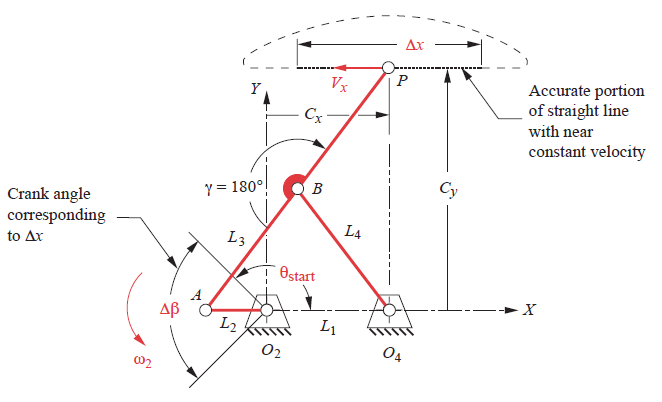

# example linkage problem using python

## solve for a single position

In [2]:
%matplotlib notebook
from math import *
from sympy import *


#set up all the variables and vectors
t3, t4 = symbols("t3 t4", real=True)

t2 = radians(130)  #set input angle

r1 = 4*exp(I*0)
r2 = 2*exp(I*t2)
r3 = 6*exp(I*t3)
r4 = 6*exp(I*t4)
r5 = 12*exp(I*t3)

#write out the equation for linkage (looks just like what we put on the board)
eq = r2+r3-r4-r1
print(eq)
print()

#write out the equation for couple point
plotpt = r2+r5

# compute numerical solution.  Remember (1,1.2) are the initial guess for t3 & t4 in radians
ans = nsolve((re(eq),im(eq)), (t3, t4), (1,1.2), tol=1.e-3)

# need to substitute numerical solution vallues for symbolic values for couple point
xpt = re(plotpt.subs(t3,ans[0]))
ypt = im(plotpt.subs(t3,ans[0]))

# remember angles are in radians.
print("Pos Soln (t2,t3,t4)=", t2,ans[0],ans[1],"Coupler Pt=",xpt,ypt)
print()

# friendlier angles are converted to degrees
print("Pos Soln (t2,t3,t4)=",degrees(t2),degrees(ans[0]),degrees(ans[1]),"Coupler Pt=",xpt,ypt)

6*exp(I*t3) - 6*exp(I*t4) - 4 + 2*exp(2.26892802759263*I)

Pos Soln (t2,t3,t4)= 2.2689280275926285 0.812289589158762 1.76509873210024 Coupler Pt= 6.96848446568797 10.2424561985532

Pos Soln (t2,t3,t4)= 130.0 46.54076520121268 101.13270777323655 Coupler Pt= 6.96848446568797 10.2424561985532


## now lets compute multiple position solutions and plot the couple point
## by iterating the input angle 0->360 degrees by a set number of degrees (eg. 5)

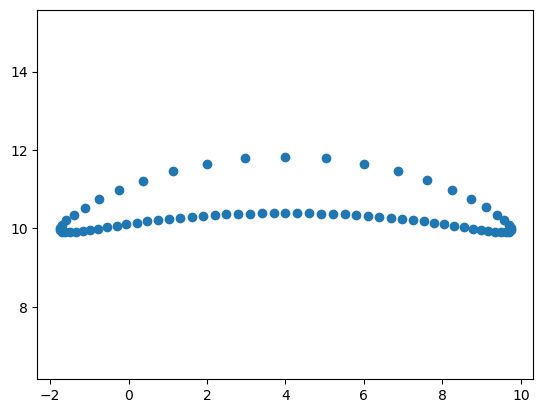

In [2]:
#%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
import numpy as np

import matplotlib
import matplotlib.pyplot as plt



#set up all the variables and vectors
#this time t2 needs to symbolic too
t2, t3, t4 = symbols("t2 t3 t4", real=True)
r1 = 4*exp(I*0)
r2 = 2*exp(I*t2)
r3 = 6*exp(I*t3)
r4 = 6*exp(I*t4)
r5 = 12*exp(I*t3)

#write out the equation for linkage (looks just like what we put on the board)
eq = r2+r3-r4-r1
plotpt = r2+r5

# create a couple of arrays big enough to hold points for plotting
xpoint = np.zeros(360)
ypoint = np.zeros(360)

# loop through input angle from 0 -> 360 by 5 degrees (can't go finer than 1 degree or you must change arrays)
index = 0
for i in range(0,360,5):
    # compute loop eq with t2 substituted 
    eq2 = eq.subs(t2,radians(i))
    ans = nsolve((re(eq2),im(eq2)), (t3, t4), (0.7,1.2), tol=1.e-3)
    
    # need to substitute numerical values for symbolic values for couple point
    xpoint[index] = re(plotpt.subs(t3,ans[0]).subs(t2,radians(i)))
    ypoint[index] = im(plotpt.subs(t3,ans[0]).subs(t2,radians(i)))
    index = index+1

# call matplotlib routines for a scatter plot

fig, ax = plt.subplots()
ax.scatter(xpoint[:index], ypoint[:index])
ax.set_aspect('equal',adjustable='datalim')
plt.show()


## now lets compute multiple position solutions and plot the couple point
## by randomly picking the input angle 

<IPython.core.display.Javascript object>


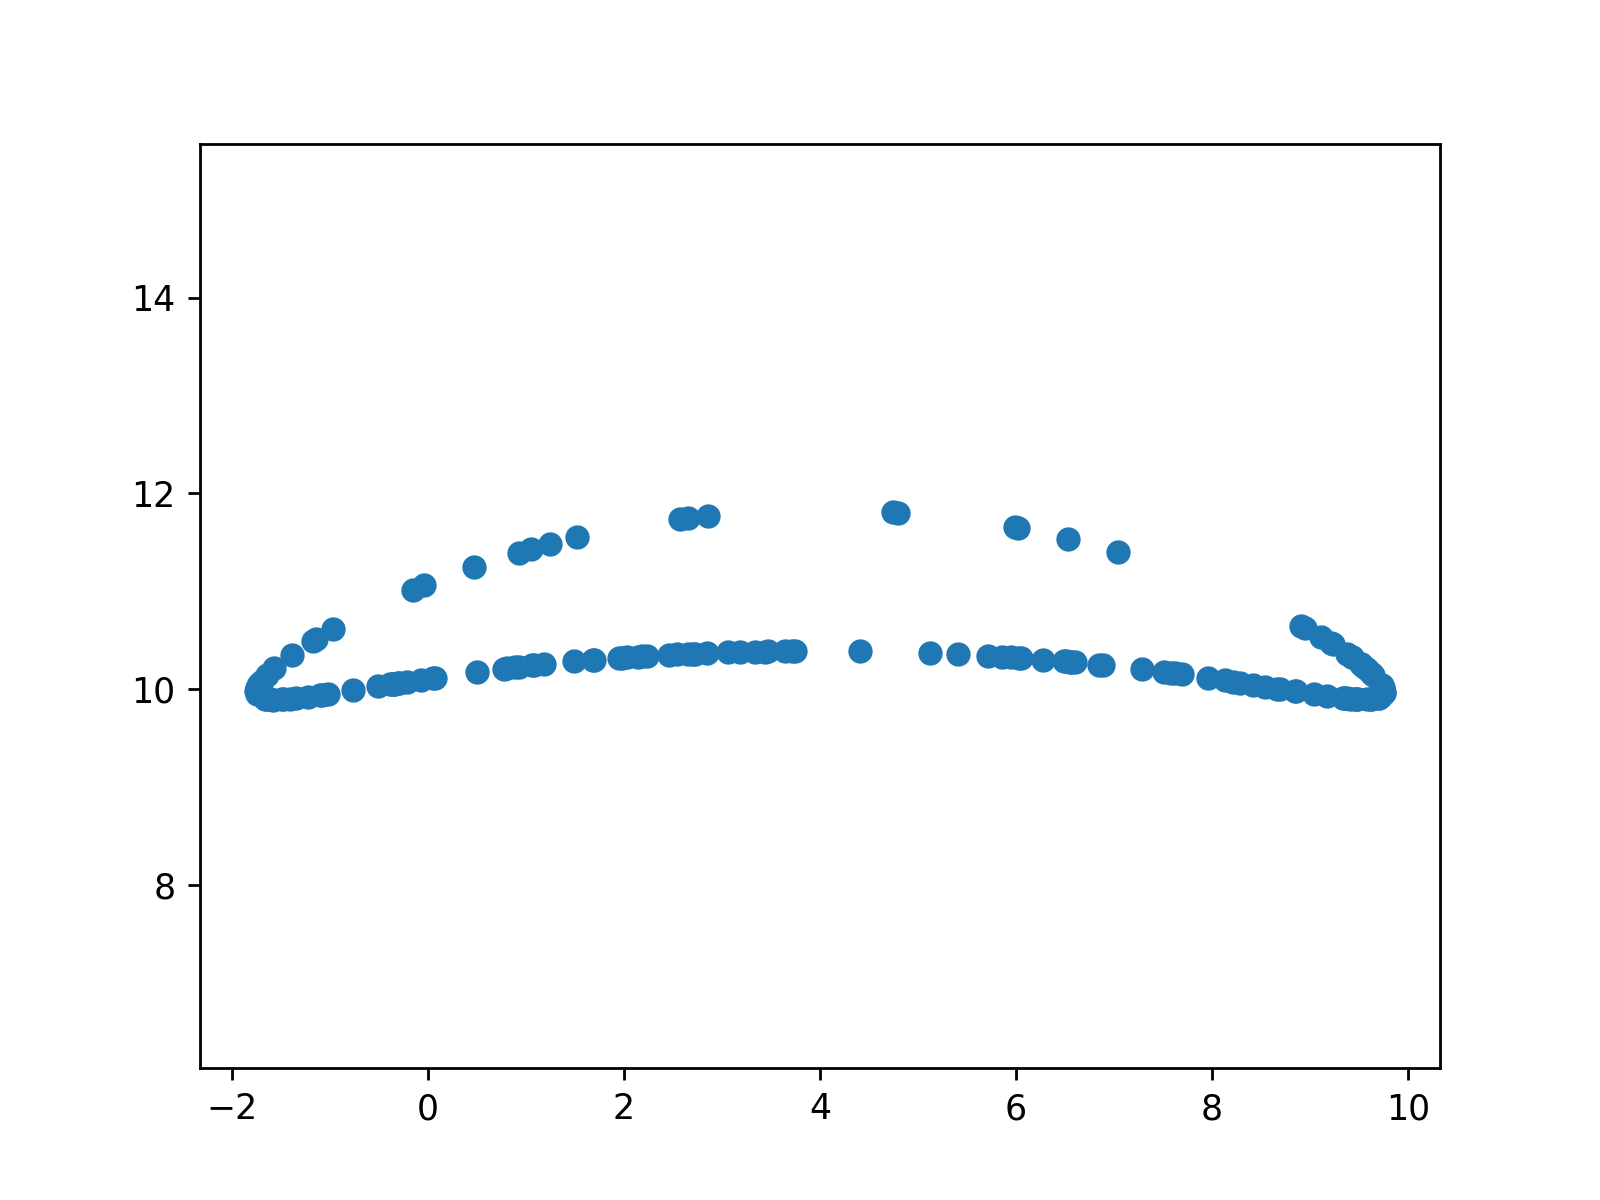

In [3]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
import numpy as np
import random

import matplotlib
import matplotlib.pyplot as plt

# create a couple of arrays big enough to hold points for plotting
npoints = 150
xpoint = np.zeros(npoints)
ypoint = np.zeros(npoints)

#set up all the variables and vectors
#this time t2 needs to symbolic too
t2, t3, t4 = symbols("t2 t3 t4", real=True)
r1 = 4*exp(I*0)
r2 = 2*exp(I*t2)
r3 = 6*exp(I*t3)
r4 = 6*exp(I*t4)
r5 = 12*exp(I*t3)

#write out the equation for linkage (looks just like what we put on the board)
eq = r2+r3-r4-r1
plotpt = r2+r5

for i in range(npoints):

    # compute loop eq with t2 substituted 
    t2rand = 2*np.pi*random.random()
    eq2 = eq.subs(t2,t2rand)
    # note: you might want to try different starting points too instead of (0.7,1.0)
    ans = nsolve((re(eq2),im(eq2)), (t3, t4), (0.7,1.0), tol=1.e-3)
    
    # need to substitute numerical values for symbolic values for couple point
    xpoint[i] = re(plotpt.subs(t3,ans[0]).subs(t2,t2rand))
    ypoint[i] = im(plotpt.subs(t3,ans[0]).subs(t2,t2rand))

# call matplotlib routines for a scatter plot 
fig, ax = plt.subplots()
ax.scatter(xpoint[:i], ypoint[:i])
ax.set_aspect('equal',adjustable='datalim')
plt.show()
